In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv('deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#total different matches
df.match_id.nunique()

756

In [5]:
match1=df[df.match_id==1]

In [6]:
match1.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
match1_inning1=match1[match1.inning==1]

In [8]:
match1_inning2=match1[match1.inning==2]

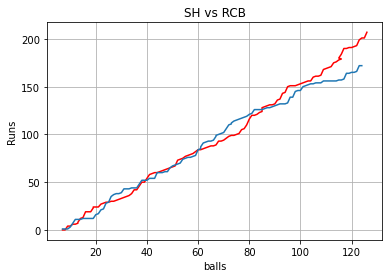

In [9]:
balls=match1_inning1.over*6+match1_inning1.ball

run_s=np.cumsum(match1_inning1.total_runs)

balls2=match1_inning2.over*6+match1_inning2.ball

run_s2=np.cumsum(match1_inning2.total_runs)
plt.plot(balls,run_s,c='red')
plt.plot(balls2,run_s2)

plt.ylabel('Runs')
plt.xlabel('balls')

plt.title('SH vs RCB')
plt.grid()

C:\Users\kpraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SH vs RCB')

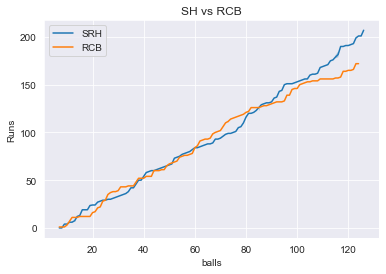

In [10]:
#setting of style should be put first

sns.set_style('darkgrid')
sns.lineplot(balls,run_s,label='SRH')
sns.lineplot(balls2,run_s2,label='RCB')

plt.ylabel('Runs')
plt.xlabel('balls')

plt.title('SH vs RCB')

In [11]:
run_type_count=match1_inning1.total_runs.value_counts()

In [12]:
runs_contribution=[]
form=[]
for i in match1_inning1.total_runs.unique():
    runs_contribution.append(run_type_count[i]*i)
    form.append(i)

In [13]:
match1_inning1.total_runs.value_counts()

1    62
0    26
4    17
2    10
6     9
3     1
Name: total_runs, dtype: int64

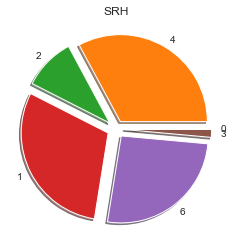

In [14]:
plt.pie(runs_contribution,labels=form,explode=np.repeat(0.1,len(form)),shadow=True)
plt.title('SRH')
plt.show()

contribution of four,six ,sigle,double, three in total runs

In [15]:
Run=[]
Ovr=[]
for i in range(1,21):
    temp=match1_inning1[match1_inning1.over==i]
    rn=np.sum(temp.total_runs)
    Run.append(rn)
    Ovr.append(i)

C:\Users\kpraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


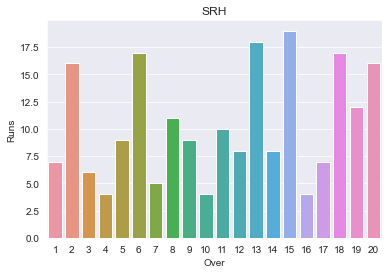

In [16]:
sns.barplot(Ovr,Run)
plt.xlabel('Over')
plt.ylabel('Runs')

plt.title('SRH')
plt.show()


In [17]:
played=match1_inning1.batsman.unique()

In [18]:
plyer_ball=[]
plyer_run=[]
for player in played:
    byhim=match1_inning1[match1_inning1.batsman==player]
    plyer_run.append(byhim.batsman_runs.sum())
    plyer_ball.append(byhim.shape[0])
playerRun={'Player':played,
          'Runs':plyer_run,
          'Balls':plyer_ball}

pd.DataFrame(playerRun)

,Player,Runs,Balls
0,DA Warner,14,9
1,S Dhawan,40,31
2,MC Henriques,52,37
3,Yuvraj Singh,62,30
4,DJ Hooda,16,12
5,BCJ Cutting,16,6


In [19]:
bowlers=match1_inning1.bowler.unique()
Over=[]
for boler in bowlers:
    temp=match1_inning1[match1_inning1.bowler==boler]
    Over.append(temp.over.nunique())

In [20]:
match1_inning2[match1_inning2.over==9]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
175,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,1,TM Head,KM Jadhav,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
176,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,2,KM Jadhav,TM Head,BCJ Cutting,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
177,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,3,KM Jadhav,TM Head,BCJ Cutting,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,4,KM Jadhav,TM Head,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,5,TM Head,KM Jadhav,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
180,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,6,KM Jadhav,TM Head,BCJ Cutting,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
181,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,7,KM Jadhav,TM Head,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
